In [1]:
# Project 4: Heart Disease Prediction (Classification) 🩺
##Project Objective: To build a machine learning model that can accurately predict whether a patient has heart disease based on a set of medical attributes. This project will serve as a comprehensive introduction to classification, one of the most common types of machine learning problems.

In [2]:
##STEP 1 : IMPORT ALL THE IMPORTANT LIBRARIES
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler , OneHotEncoder , LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [3]:
sns.set_style('whitegrid')

In [4]:
##STEP 2 : SETTING UP THE DATAFRAME
heart_df = pd.read_csv('heart_disease_uci.csv')

In [5]:
##STEP 3 : IMPLEMENT EDA
print(f'Statistical Information about Dataset :')
heart_df.describe()

Statistical Information about Dataset :


,id,age,trestbps,chol,thalch,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


In [6]:
print(f'Overall Abstract Information about Dataset :')
heart_df.info()

Overall Abstract Information about Dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   dataset   920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalch    865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [7]:
heart_df.shape

(920, 16)

In [8]:
heart_df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


In [9]:
##STEP 4 : CHECKING AND HANDLING THE NULL VALUES
heart_df.isnull().sum()

id            0
age           0
sex           0
dataset       0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalch       55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [10]:
 heart_df['thal'].value_counts()

thal
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [11]:
##checked all the attributes with null values and they are broadly classified as : 
numeric_cols = ['trestbps' , 'chol' , 'thalch' , 'oldpeak']

binary_categorical_cols = ['fbs' , 'exang']

label_categorical_cols = ['restecg', 'slope' , 'thal','ca']

In [15]:
#impute all numeric_cols with the median values of the col
for col in numeric_cols:
    if heart_df[col].isnull().any():
        heart_df[col] = heart_df[col].fillna(heart_df[col].median())

#impute all the binary_categorical_cols with mode of the col
for col in binary_categorical_cols:
    if heart_df[col].isnull().any():
        heart_df[col] = heart_df[col].fillna(heart_df[col].mode()[0])

#impute label_categorical_cols with mode pof the col
for col in label_categorical_cols:
    if heart_df[col].isnull().any():
        heart_df[col] = heart_df[col].fillna(heart_df[col].mode()[0])


In [16]:
heart_df.isnull().sum().sum()

np.int64(0)

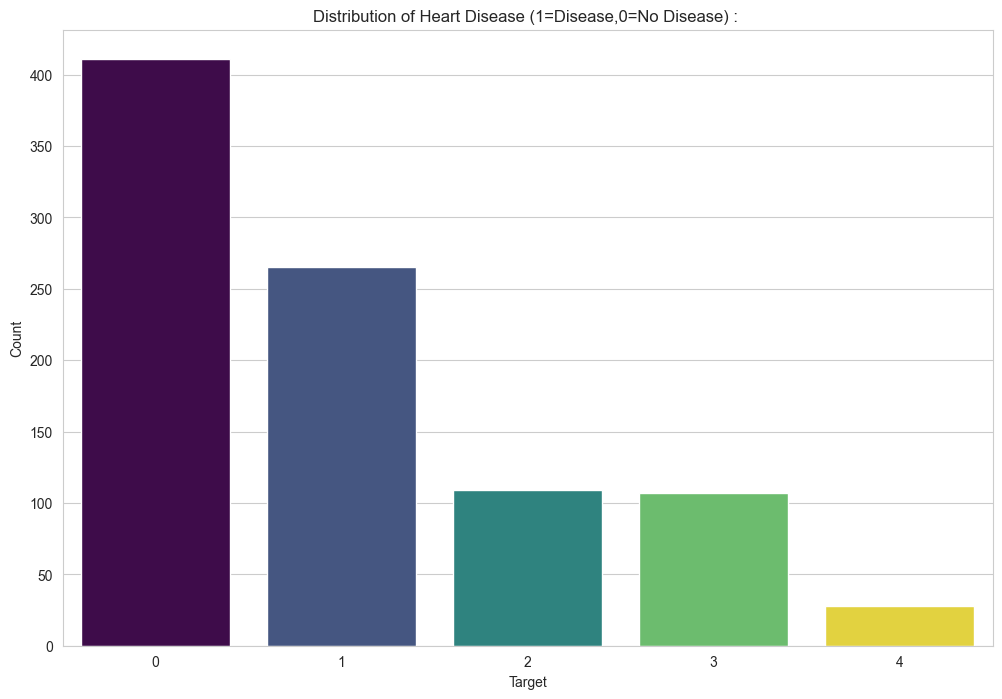

In [17]:
##STEP 5 : ANALYZING FEATURES 
plt.figure(figsize=(12,8))
sns.countplot(data=heart_df,x='num',hue='num',legend=False,palette='viridis').set_title('Distribution of Heart Disease (1=Disease,0=No Disease) : ')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()

In [18]:
#OBSERVATION : '0' symbolizes that guy doesn't have any heart disease and '1','2','3','4' means person has some heart disease , of different levels/types/kinds

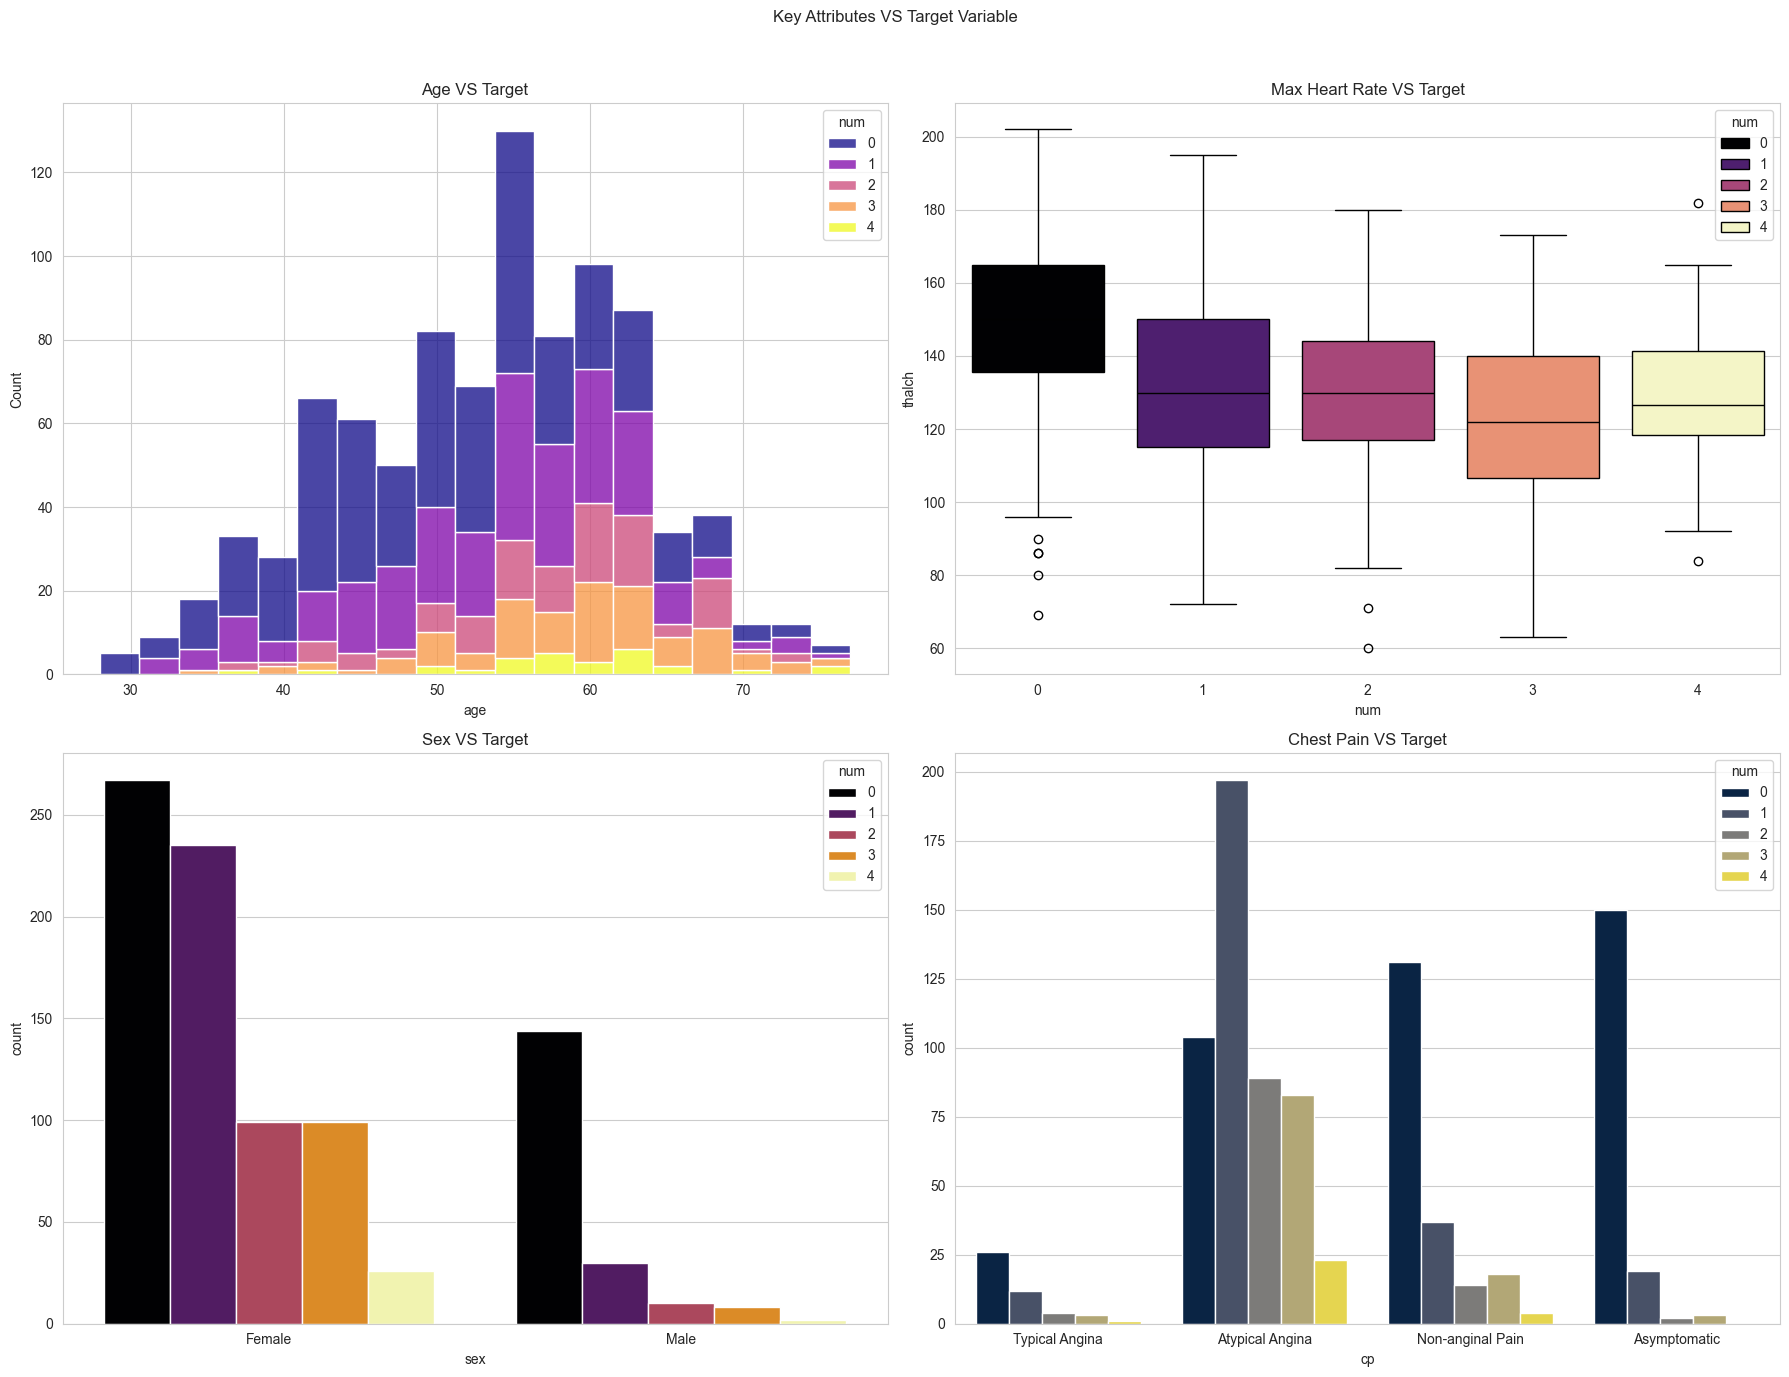

In [19]:
#visualizing the relationships between key features and the target
fig , axes = plt.subplots(2,2,figsize=(18,14))
fig.suptitle('Key Attributes VS Target Variable')

sns.histplot(ax=axes[0,0],data=heart_df,x='age',hue='num',multiple='stack',palette='plasma').set_title('Age VS Target')

sns.boxplot(ax=axes[0,1],data=heart_df,x='num',y='thalch',palette='magma',hue='num').set_title('Max Heart Rate VS Target')

gender_plot = sns.countplot(ax=axes[1,0],data=heart_df,x='sex',hue='num',palette='inferno')
gender_plot.set_title('Sex VS Target')
#we are basically setting up the x-axis labels with the following:
gender_plot.set_xticks(range(len(heart_df['sex'].unique())))
gender_plot.set_xticklabels(['Female','Male'])

cp_plot = sns.countplot(ax=axes[1,1],data=heart_df,x='cp',hue='num',palette='cividis')
cp_plot.set_title('Chest Pain VS Target')
cp_plot.set_xticks(range(len(heart_df['cp'].unique())))
cp_plot.set_xticklabels(['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [20]:
#OBSERVATION : 
##1. People with no heart disease tend to have more max. heart rate
##2. Typically 'Female' show more levels of heart diseases compared to 'Male' population
##3. Patients with chest pain-'Atypical Angina' and 'Non-aginal Pain' tend to have heart disease

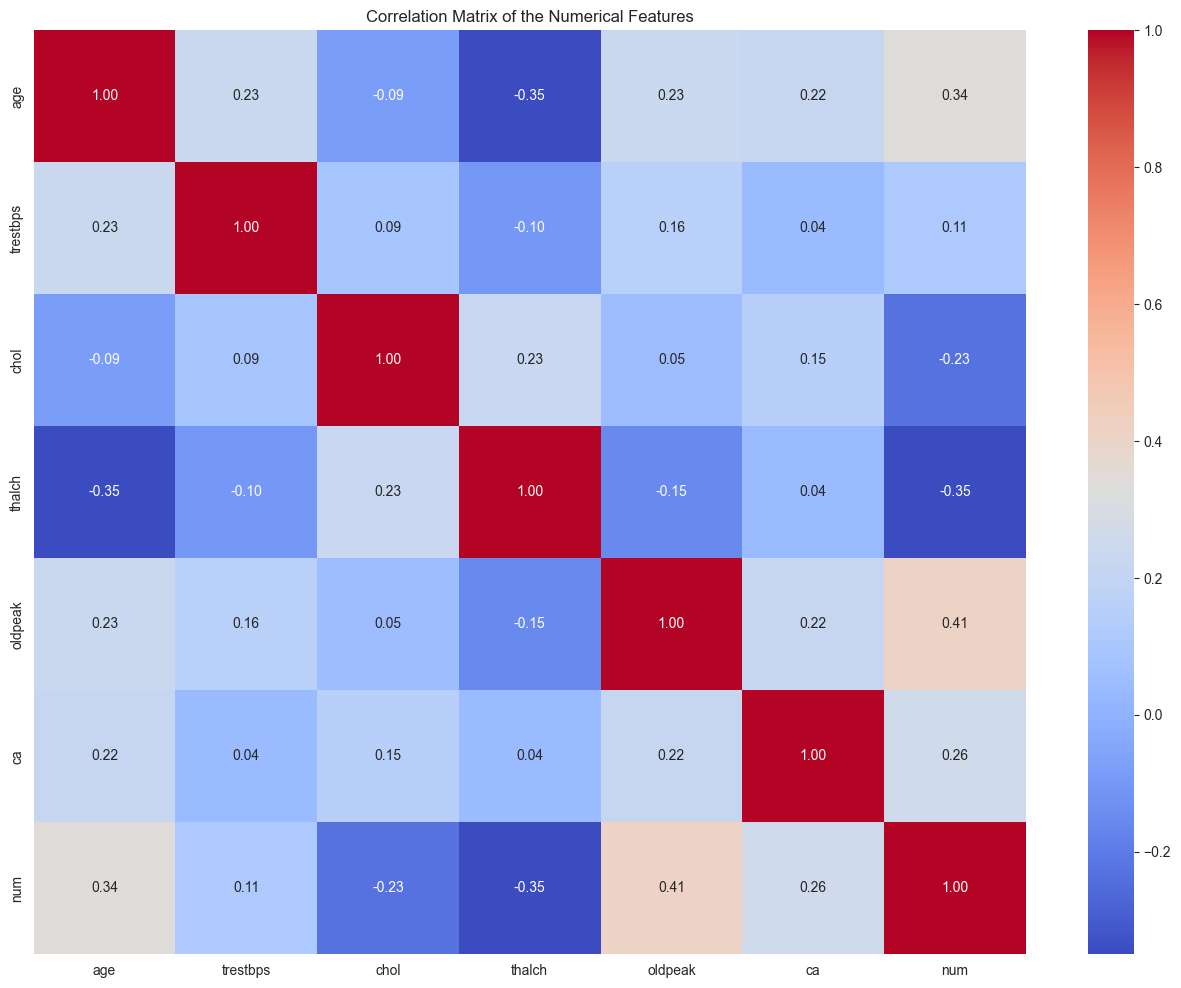

In [21]:
#imputing correlation heatmap to understand the dependancies of the numerical attributes
plt.figure(figsize=(16,12))
numerical_df = heart_df.select_dtypes(include=np.number)
numerical_df = numerical_df.drop(columns='id')
sns.heatmap(numerical_df.corr(),cmap='coolwarm',annot=True,fmt='.2f')
plt.title('Correlation Matrix of the Numerical Features')
plt.show()

In [22]:
##STEP 6 : DATA PREPROCESSING AND MODEL BUILDING

In [23]:
##1. RANDOM FOREST CLASSIFIER using Pipeline
from sklearn.impute import SimpleImputer

X = heart_df.drop(columns='num')
Y = heart_df['num']

In [24]:
#dataset and id are not significant for classification so we may drop them
X = X.drop(columns=['dataset','id'])

In [25]:
categorical_cols = binary_categorical_cols + label_categorical_cols + ['sex' , 'cp']
categorical_cols

['fbs', 'exang', 'restecg', 'slope', 'thal', 'ca', 'sex', 'cp']

In [26]:
numeric_cols = numeric_cols + ['age']
numeric_cols

['trestbps', 'chol', 'thalch', 'oldpeak', 'age']

In [27]:
#Creating preprocessing pipeline for numerical and categorical fetaures
##Pipeline means a set of events chained together so it will have 3 steps : Data -> Imputation , Encoding , Scaling -> Prediction
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numerical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='mean')),    ##Fill missing values with mean 
    ('scaler',StandardScaler())                   ##Standard SCaler to scale fetaures to std=1 and mean=0
])

categorical_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='most_frequent')),             ##Fill missing values with mode
    ('scaler',OneHotEncoder(drop='first',handle_unknown='ignore'))   ##Creates new cols for each value of a attribute
])

In [28]:
# Create a column transformer to apply different transformations to different columns
preprocessor = ColumnTransformer(
    transformers=[ ('num',numerical_transformer,numeric_cols) , ('cat',categorical_transformer,categorical_cols) ]
)

In [29]:
x_train , x_test , y_train , y_test = train_test_split(X,Y,random_state=42,test_size=0.2,stratify=Y)

In [32]:
from sklearn import metrics
rag_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',RandomForestClassifier(random_state=42))
])

rag_pipeline.fit(x_train,y_train)
y_predicted = rag_pipeline.predict(x_test)

accuracy_score = metrics.accuracy_score(y_test,y_predicted)
print(f"Accuracy Score :",accuracy_score)
print(f"Classifiction Report :")
print(classification_report(y_test,y_predicted,zero_division=0))
print(f"Confusion Matrix :")
print(confusion_matrix(y_test,y_predicted))

Accuracy Score : 0.5543478260869565
Classifiction Report :
              precision    recall  f1-score   support

           0       0.74      0.85      0.80        82
           1       0.51      0.49      0.50        53
           2       0.15      0.14      0.14        22
           3       0.16      0.14      0.15        21
           4       0.00      0.00      0.00         6

    accuracy                           0.55       184
   macro avg       0.31      0.32      0.32       184
weighted avg       0.51      0.55      0.53       184

Confusion Matrix :
[[70  7  5  0  0]
 [16 26  5  6  0]
 [ 3  7  3  9  0]
 [ 5  9  4  3  0]
 [ 0  2  3  1  0]]


In [33]:
##2.LOGISTIC REGRESSION 
#STEP 1 : import all the sklearn libraries
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn import metrics

#STEP 2 : setup the fetaures for predicting target variable
X_lr = heart_df.drop(columns=['num','id','dataset'])
Y_lr  = heart_df['num']

#STEP 3 : seperate all the different columns
numerical_lr_cols = numeric_cols
categorical_lr_cols = categorical_cols

#STEP 4 : create different transformers using pipelines to handle and transform columns defined prior to this
numerical_lr_transformer = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='median')),
    ('scaling',StandardScaler())
])

categorical_lr_transformer = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='most_frequent')),
    ('encode',OneHotEncoder(drop='first',handle_unknown='ignore'))
])

#STEP 5 : implement a column transformer using all the transformers defined above
preprocessor_lr = ColumnTransformer(transformers=[
    ('num',numerical_lr_transformer,numerical_lr_cols),('cat',categorical_lr_transformer,categorical_lr_cols)
])

#STEP 6 : split the data into training and testing data
x_train_lr , x_test_lr , y_train_lr , y_test_lr = train_test_split(X_lr,Y_lr,random_state=42,stratify=Y_lr)

#STEP 7 : create a pipeline to implement preprocessing of data and build model 
lr_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor_lr),
    ('model',LogisticRegression(random_state=42))
])

lr_pipeline.fit(x_train_lr,y_train_lr)
y_pred_lr = lr_pipeline.predict(x_test_lr)

accuracy_score_lr = metrics.accuracy_score(y_test_lr,y_pred_lr)
print(f"Accuracy Score :",accuracy_score_lr)

print(f"Classification Report :")
print(classification_report(y_test_lr,y_pred_lr , zero_division=0))

print(f"Confusion Matrix :")
print(confusion_matrix(y_test_lr,y_pred_lr))

Accuracy Score : 0.5521739130434783
Classification Report :
              precision    recall  f1-score   support

           0       0.77      0.82      0.79       103
           1       0.49      0.53      0.51        66
           2       0.07      0.04      0.05        27
           3       0.19      0.26      0.22        27
           4       0.00      0.00      0.00         7

    accuracy                           0.55       230
   macro avg       0.31      0.33      0.31       230
weighted avg       0.52      0.55      0.53       230

Confusion Matrix :
[[84 14  2  3  0]
 [16 35  7  8  0]
 [ 2 10  1 14  0]
 [ 6 11  3  7  0]
 [ 1  1  1  4  0]]


In [34]:
#3.SUPPORT VECTOR MACHINE
##we need to follow the above steps as it is but since its already done we can directly skip here to the tarining part
from sklearn.svm import SVC

svm_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',SVC(random_state=42))
])

svm_pipeline.fit(x_train,y_train)
y_pred_svm = svm_pipeline.predict(x_test)

accuracy_score_svm = metrics.accuracy_score(y_test,y_pred_svm)
print(f"Accuracy Score :",accuracy_score_svm)

print(f"Classification Report :")
print(classification_report(y_test,y_pred_svm , zero_division=0))

print(f"Confusion Matrix :")
print(confusion_matrix(y_test,y_pred_svm))


Accuracy Score : 0.5652173913043478
Classification Report :
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        82
           1       0.47      0.58      0.52        53
           2       0.25      0.09      0.13        22
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         6

    accuracy                           0.57       184
   macro avg       0.30      0.31      0.29       184
weighted avg       0.50      0.57      0.53       184

Confusion Matrix :
[[71  9  1  1  0]
 [14 31  1  7  0]
 [ 3 10  2  7  0]
 [ 6 13  2  0  0]
 [ 0  3  2  1  0]]


In [35]:
#4. KNN CLUSTERING 
from sklearn.neighbors import KNeighborsClassifier

knn_pipeline = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('model',SVC(random_state=42))
])

knn_pipeline.fit(x_train,y_train)
y_pred_knn = knn_pipeline.predict(x_test)

accuracy_score_knn = metrics.accuracy_score(y_test,y_pred_knn)
print(f"Accuracy Score :",accuracy_score_knn)

print(f"Classification Report :")
print(classification_report(y_test,y_pred_knn , zero_division=0))

print(f"Confusion Matrix :")
print(confusion_matrix(y_test,y_pred_knn))


Accuracy Score : 0.5652173913043478
Classification Report :
              precision    recall  f1-score   support

           0       0.76      0.87      0.81        82
           1       0.47      0.58      0.52        53
           2       0.25      0.09      0.13        22
           3       0.00      0.00      0.00        21
           4       0.00      0.00      0.00         6

    accuracy                           0.57       184
   macro avg       0.30      0.31      0.29       184
weighted avg       0.50      0.57      0.53       184

Confusion Matrix :
[[71  9  1  1  0]
 [14 31  1  7  0]
 [ 3 10  2  7  0]
 [ 6 13  2  0  0]
 [ 0  3  2  1  0]]


In [36]:
#OBSERVATION : Accuracies of Model are : SVM(56.5%) , RFC(56.5%) , LR(55.21%) , KNN(56.5%)

In [39]:
#################/////// SUBMISSION USING MANUAL PREPROCESSING INSTEAD OF PIPELINE ////////////////###############

X_man = heart_df.drop(columns=['dataset','id','num'])
Y_man = heart_df['num']

numeric_cols_man = numeric_cols
categorical_cols_man = categorical_cols

scaler = StandardScaler();
heart_df[numeric_cols_man] = scaler.fit_transform(heart_df[numeric_cols_man])

encoder = OneHotEncoder(drop='first',handle_unknown='ignore',sparse_output=False)
categorical_encoded = encoder.fit_transform(heart_df[categorical_cols_man])
encoded_df = pd.DataFrame(categorical_encoded,
                          columns=encoder.get_feature_names_out(categorical_cols_man),
                          index=X_man.index)
X_man = pd.concat([X_man.drop(columns=categorical_cols_man,errors='ignore') , encoded_df],axis=1)

x_train_man,x_test_man,y_train_man,y_test_man = train_test_split(X_man,Y_man,test_size=0.2,random_state=42)

lr_man = LogisticRegression(random_state=42,max_iter=100)
lr_man.fit(x_train_man,y_train_man)
y_pred_man = lr_man.predict(x_test_man)

print("Accuracy:", metrics.accuracy_score(y_test_man, y_pred_man))
print("\nClassification Report:")
print(classification_report(y_test_man, y_pred_man, zero_division=0))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test_man, y_pred_man))

Accuracy: 0.5380434782608695

Classification Report:
              precision    recall  f1-score   support

           0       0.67      0.85      0.75        75
           1       0.42      0.50      0.46        54
           2       0.14      0.04      0.06        25
           3       0.39      0.27      0.32        26
           4       0.00      0.00      0.00         4

    accuracy                           0.54       184
   macro avg       0.33      0.33      0.32       184
weighted avg       0.47      0.54      0.49       184


Confusion Matrix:
[[64 10  0  1  0]
 [24 27  0  3  0]
 [ 3 16  1  5  0]
 [ 4 10  5  7  0]
 [ 0  1  1  2  0]]
